<a href="https://colab.research.google.com/github/ricardoBatista77/Business-IA/blob/master/Stock_Price_prediction_for_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
#Get the stock quote
df = web.DataReader('GOOGL', data_source='yahoo', start='2012-01-01', end='2020-04-19')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345600.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722200.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559200.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380400.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633500.0,311.541534
...,...,...,...,...,...,...
2020-04-13,1214.520020,1182.329956,1201.500000,1210.410034,1935100.0,1210.410034
2020-04-14,1275.750000,1228.540039,1239.969971,1265.229980,3167900.0,1265.229980
2020-04-15,1275.109985,1234.000000,1246.510010,1257.300049,2111800.0,1257.300049


In [3]:
#Get the number of rows and columns in the data set
df.shape

(2086, 6)

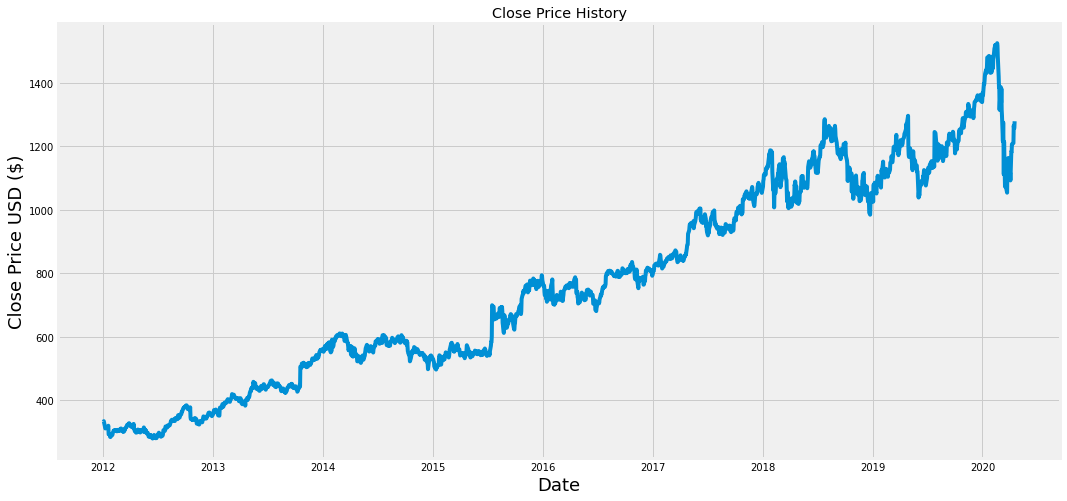

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1669

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04275536],
       [0.04390909],
       [0.04018266],
       ...,
       [0.78509563],
       [0.78520005],
       [0.8025244 ]])

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.04275536, 0.04390909, 0.04018266, 0.03656878, 0.02549001,
       0.02576338, 0.02689698, 0.02837628, 0.02650704, 0.02795019,
       0.02969077, 0.03236802, 0.01082955, 0.01064059, 0.00879549,
       0.00419674, 0.00363797, 0.00841359, 0.00749303, 0.00846584,
       0.00875529, 0.01047578, 0.01498609, 0.02011545, 0.01918284,
       0.02042095, 0.02106816, 0.01883713, 0.02136562, 0.02038477,
       0.01869642, 0.01908234, 0.0183266 , 0.02208921, 0.01965315,
       0.01891753, 0.02044105, 0.02020388, 0.02385394, 0.02379766,
       0.02546589, 0.02500362, 0.0221897 , 0.01845523, 0.01919489,
       0.01933157, 0.01656187, 0.01853161, 0.02360871, 0.02288917,
       0.02495538, 0.02652714, 0.03012091, 0.02992395, 0.03253283,
       0.03497291, 0.03358202, 0.03629142, 0.03536282, 0.03887621])]
[0.03592159829420327]

[array([0.04275536, 0.04390909, 0.04018266, 0.03656878, 0.02549001,
       0.02576338, 0.02689698, 0.02837628, 0.02650704, 0.02795019,
       0.02969077, 0.03236802, 0.01

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1609, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1609/1609 [==============================] - 61s 38ms/step - loss: 0.0011


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

37.583712476358194

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


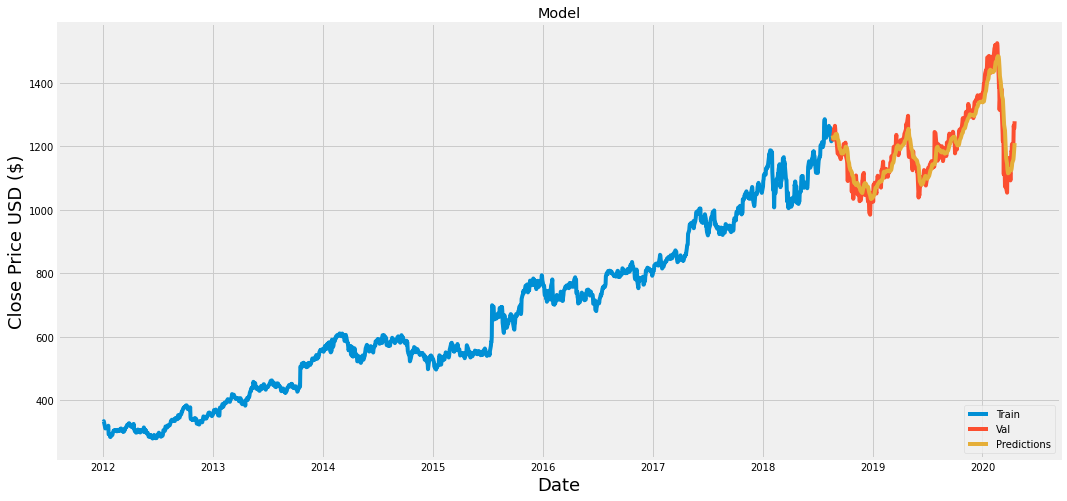

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-21,1217.410034,1234.405151
2018-08-22,1221.750000,1230.480835
2018-08-23,1221.160034,1227.460083
2018-08-24,1236.750000,1225.094116
2018-08-27,1256.270020,1224.852417
...,...,...
2020-04-13,1210.410034,1158.816772
2020-04-14,1265.229980,1169.244629
2020-04-15,1257.300049,1183.823975


In [22]:
#Get the quote
apple_quote = web.DataReader('GOOGL', data_source='yahoo', start='2012-01-01', end='2020-04-19')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1222.7943]]


In [23]:
#Get the quote
apple_quote2 = web.DataReader('GOOGL', data_source='yahoo', start='2020-04-18', end='2020-04-18')
print(apple_quote2['Close'])

Date
2020-04-17    1279
Name: Close, dtype: int64
